In [81]:
# Importing the required libraries for analysis
# Read the data into a pandas dataframe

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import timedelta


df = pd.read_csv(r"C:\Users\divya\Downloads\Los Angeles Crime Dataset\Crime_Data_from_2020_to_Present.csv")
print(df.head())

       DR_NO       Date Rptd        DATE OCC  TIME OCC  AREA    AREA NAME  \
0   10304468   1/8/2020 0:00   1/8/2020 0:00      2230     3    Southwest   
1  190101086   1/2/2020 0:00   1/1/2020 0:00       330     1      Central   
2  200110444  4/14/2020 0:00  2/13/2020 0:00      1200     1      Central   
3  191501505   1/1/2020 0:00   1/1/2020 0:00      1730    15  N Hollywood   
4  191921269   1/1/2020 0:00   1/1/2020 0:00       415    19      Mission   

   Rpt Dist No  Part 1-2  Crm Cd  \
0          377         2     624   
1          163         2     624   
2          155         2     845   
3         1543         2     745   
4         1998         2     740   

                                         Crm Cd Desc  ... Status  \
0                           BATTERY - SIMPLE ASSAULT  ...     AO   
1                           BATTERY - SIMPLE ASSAULT  ...     IC   
2          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE  ...     AA   
3           VANDALISM - MISDEAMEANOR ($399 OR UN

In [82]:
#To display which feature contains how many null values

print(df.isnull().sum())

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes            82369
Vict Age               0
Vict Sex           78682
Vict Descent       78687
Premis Cd              6
Premis Desc          273
Weapon Used Cd    383954
Weapon Desc       383954
Status                 0
Status Desc            0
Crm Cd 1               6
Crm Cd 2          549530
Crm Cd 3          593447
Crm Cd 4          594933
LOCATION               0
Cross Street      495092
LAT                    0
LON                    0
dtype: int64


In [4]:
# Prints the information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594977 entries, 0 to 594976
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           594977 non-null  int64  
 1   Date Rptd       594977 non-null  object 
 2   DATE OCC        594977 non-null  object 
 3   TIME OCC        594977 non-null  int64  
 4   AREA            594977 non-null  int64  
 5   AREA NAME       594977 non-null  object 
 6   Rpt Dist No     594977 non-null  int64  
 7   Part 1-2        594977 non-null  int64  
 8   Crm Cd          594977 non-null  int64  
 9   Crm Cd Desc     594977 non-null  object 
 10  Mocodes         512608 non-null  object 
 11  Vict Age        594977 non-null  int64  
 12  Vict Sex        516295 non-null  object 
 13  Vict Descent    516290 non-null  object 
 14  Premis Cd       594971 non-null  float64
 15  Premis Desc     594704 non-null  object 
 16  Weapon Used Cd  211023 non-null  float64
 17  Weapon Des

In [5]:
#  head () method is used to return top 5 rows(default) of a data frame
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,1/8/2020 0:00,1/8/2020 0:00,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,1/2/2020 0:00,1/1/2020 0:00,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,4/14/2020 0:00,2/13/2020 0:00,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,1/1/2020 0:00,1/1/2020 0:00,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,1/1/2020 0:00,1/1/2020 0:00,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [6]:
# updating exsisting 
!pip install seaborn --upgrade --user

Requirement already up-to-date: seaborn in c:\users\divya\appdata\roaming\python\python37\site-packages (0.12.1)


In [7]:
# updating
!pip install pandas --upgrade --user

Requirement already up-to-date: pandas in c:\users\divya\anaconda3\lib\site-packages (1.3.5)


In [8]:
import seaborn as sns
sns.__version__

'0.12.1'

In [9]:
# reading the columns name
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [116]:
# select numerical columns
df_num = df.select_dtypes(include=[np.number])
numeric_cols = df_num.columns.values
# select non-numeric columns
df_non_num = df.select_dtypes(exclude=[np.number])
non_num_cols = df_non_num.columns.values

In [117]:
#calculating the percentage of values missing in each column, and then storing this information in a DataFrame
# % of values missing in each column
values_list = list()
cols_list = list()
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)
pct_missing_df = pd.DataFrame()
pct_missing_df['col'] = cols_list
pct_missing_df['pct_missing'] = values_list


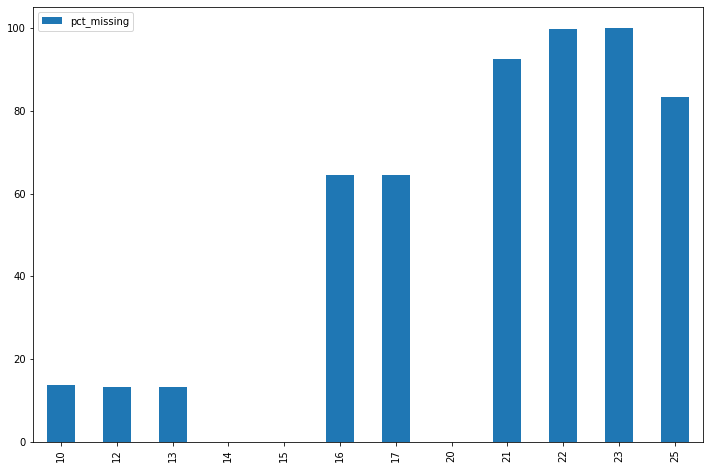

In [118]:
pct_missing_df.loc[pct_missing_df.pct_missing > 0].plot(kind='bar', figsize=(12,8))
plt.show()

 ***DATA CLEANING***

dropping of columns that have more than 70% of null values and also columns that are not required for analysis

In [10]:
df.drop('Crm Cd 2', axis=1, inplace=True)

In [11]:
df.drop('Crm Cd 3', axis=1, inplace=True)

In [12]:
df.drop('Crm Cd 4', axis=1, inplace=True)

In [13]:
df.drop('Cross Street', axis=1, inplace=True)

In [15]:
df.drop('Mocodes', axis=1, inplace=True)

In [68]:
# Checking if there are any null values
print(df.isnull().sum())

DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
Crm Cd 1          0
LOCATION          0
LAT               0
LON               0
dtype: int64


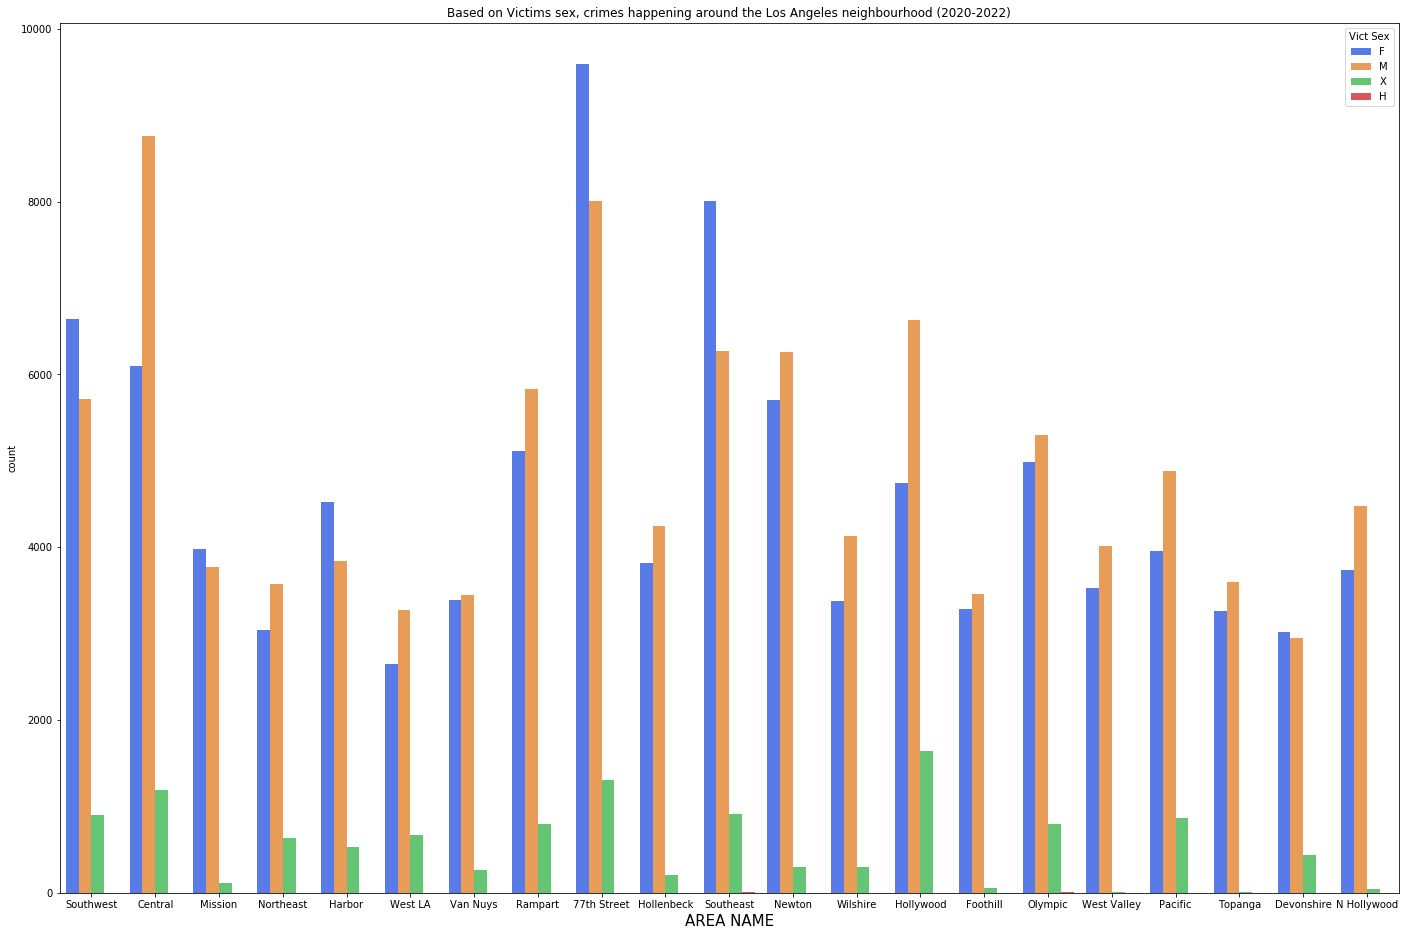

In [71]:
# Areas that are more vulnerable for a particular gender in the Los Angeles neighbourhood 

fig,ax = plt.subplots(figsize=(24,16))
sns.countplot(x='AREA NAME',hue='Vict Sex',data=df,palette='bright',alpha=0.75)
ax.set_title('Based on Victims sex, crimes happening around the Los Angeles neighbourhood (2020-2022)')
ax.set_xlabel('AREA NAME', fontsize=15);

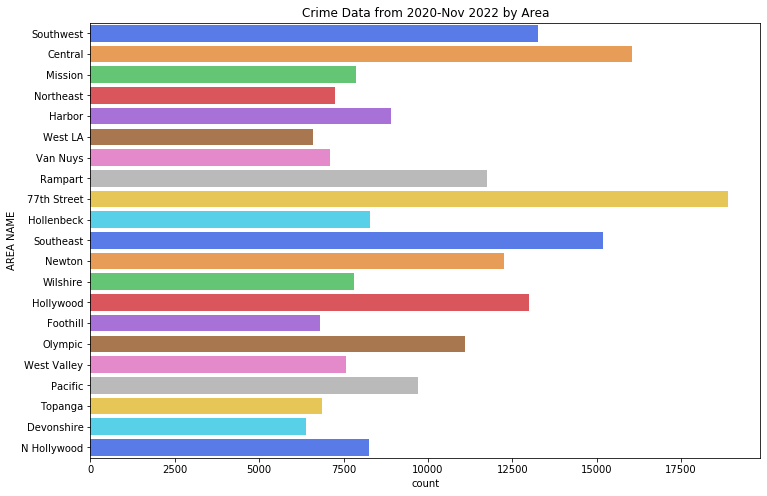

In [31]:
# Number of crimes that occured based on the Area in the neighbourhood of Los Angeles
# Visualizing through bar graph
fig,ax = plt.subplots(figsize=(12,8))
sns.countplot(y='AREA NAME',data= df,palette='bright',alpha=0.75)
ax.set_title('Crime Data from 2020-Nov 2022 by Area');


#Crime Data from (2020-Nov 2022) by Area

In [32]:
df['AREA NAME'].value_counts() # Checks out

77th Street    18892
Central        16038
Southeast      15197
Southwest      13260
Hollywood      13002
Newton         12266
Rampart        11750
Olympic        11082
Pacific         9699
Harbor          8893
Hollenbeck      8268
N Hollywood     8258
Mission         7868
Wilshire        7804
West Valley     7558
Northeast       7251
Van Nuys        7096
Topanga         6867
Foothill        6798
West LA         6586
Devonshire      6392
Name: AREA NAME, dtype: int64

In [69]:
# Using Counter method from Collection module to

from collections import Counter
print(Counter(df['Vict Sex']))

Counter({'M': 102412, 'F': 96437, 'X': 11955, 'H': 21})


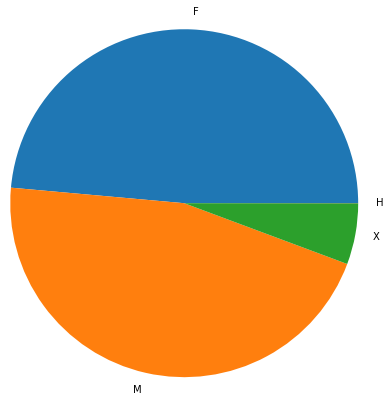

M    102412
F     96437
X     11955
H        21
Name: Vict Sex, dtype: int64


In [70]:
# Visualizing through Pie chart for Victims based on Victims sex

values = df['Vict Sex'].value_counts()
lbls = df['Vict Sex'].unique().tolist()

plt.pie(values, labels= lbls, radius = 2)
plt.show()
print(values)

(array([146639.,  16753., 102768., 121608.,  82755.,  64004.,  39526.,
         15303.,   4467.,    945.,    208.,      0.]),
 array([ -1,   9,  19,  29,  39,  49,  59,  69,  79,  89,  99, 109, 119]),
 <a list of 12 Patch objects>)

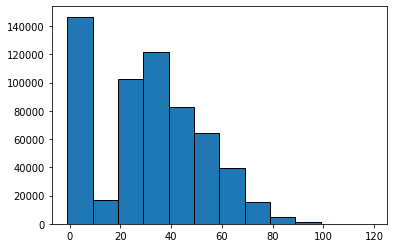

In [107]:
# Visualizing through histogram of Victim age

victim_age = np.arange(df['Vict Age'].min(), df['Vict Age'].max(), 10)
plt.hist(df['Vict Age'].dropna(), bins=victim_age, alpha=1, edgecolor='black')

In [57]:
# Types of Crimes that occured in number

df.groupby("Crm Cd Desc")["Crm Cd Desc"].count().sort_values()

Crm Cd Desc
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)        1
INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)              1
EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)                  1
DRIVING WITHOUT OWNER CONSENT (DWOC)                      1
TILL TAP - PETTY ($950 & UNDER)                           1
                                                      ...  
CRIMINAL THREATS - NO WEAPON DISPLAYED                12365
ROBBERY                                               20943
INTIMATE PARTNER - SIMPLE ASSAULT                     30681
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT        35200
BATTERY - SIMPLE ASSAULT                              47530
Name: Crm Cd Desc, Length: 115, dtype: int64

In [58]:
#Crimes that occured on a given date

df.groupby("DATE OCC")["DATE OCC"].count().sort_values()

DATE OCC
10/31/2022 0:00     34
4/9/2020 0:00      123
1/26/2021 0:00     126
12/14/2021 0:00    132
12/28/2020 0:00    135
                  ... 
7/4/2020 0:00      295
1/1/2021 0:00      318
7/4/2021 0:00      326
5/30/2020 0:00     337
1/1/2020 0:00      454
Name: DATE OCC, Length: 1035, dtype: int64

In [110]:
# Top 10 crimes that happened in the neighbourhood of Loc Angeles

df3=df['Crm Cd Desc'].value_counts()[:10]
print(df3)

VEHICLE - STOLEN                                           65133
BATTERY - SIMPLE ASSAULT                                   47565
BURGLARY FROM VEHICLE                                      37675
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    37578
BURGLARY                                                   36286
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             35225
THEFT OF IDENTITY                                          34889
INTIMATE PARTNER - SIMPLE ASSAULT                          30769
THEFT PLAIN - PETTY ($950 & UNDER)                         30733
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)            24259
Name: Crm Cd Desc, dtype: int64
